In [61]:
import data_aggregator as dr
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import cross_validation
import sklearn.metrics as metrics
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter, OrderedDict
from pprint import *
%matplotlib inline

In [33]:
filepath = 'data/dataset_mood_smartphone.csv'

data_aggregator = dr.DataAggregator(filepath)
window_size = 5
data, target = data_aggregator.read()

data opened


Counter({7: 0.502262443438914, 6: 0.333710407239819, 8: 0.09841628959276018, 5: 0.053167420814479636, 4: 0.006787330316742082, 3: 0.003393665158371041, 9: 0.0022624434389140274})
OrderedDict([('normal weighted', 0.51187335092348285), ('normal', 0.48812664907651715), ('random forest', 0.56464379947229548)])


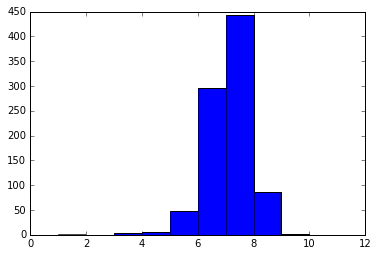

In [119]:
data_train, data_test, target_train, target_test = cross_validation.train_test_split(data, target,
                                                                                         test_size=0.3)

# target_train = np.append(target_train, [10])
plt.hist(target_train, bins=range(1,12))
weights = Counter(target_train.tolist())
total = sum(weights.values(), 0.0)
for key in weights:
    weights[key] /= total

clfw = DecisionTreeClassifier(class_weight=weights)
clf = DecisionTreeClassifier()
rfc = RandomForestClassifier(n_estimators = 20)
clfw = clfw.fit(data_train, target_train)
clf          = clf.fit(data_train, target_train)
rfc          = rfc.fit(data_train, target_train)

scores = OrderedDict()

scores['normal weighted'] = clfw.score(data_test, target_test)
scores['normal'] = clf.score(data_test, target_test)
scores['random forest'] = rfc.score(data_test, target_test)


print weights
pprint(scores)
plt.show()